In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import torch
import matplotlib.pyplot as plt

## Callbacks

### Callbacks as GUI events

In [3]:
import ipywidgets as widgets

In [4]:
def f(o): print('hi')

In [5]:
w = widgets.Button(description='Click me')

In [6]:
w

Button(description='Click me', style=ButtonStyle())

hi
hi
hi
hi


In [8]:
##Call back f when button clickedfrom time import sleep
w.on_click(f)

In [9]:
from time import sleep

In [12]:
def slow_calculation(cb=None):
    res = 0
    for i in range(5):
        res += i*i
        sleep(1)
        if cb: cb(i)
    return res


In [11]:
slow_calculation()

30

In [15]:
def show_progress(epoch):
    print('Epoch finished: ', epoch)


In [16]:
slow_calculation(show_progress)

Epoch finished:  0
Epoch finished:  1
Epoch finished:  2
Epoch finished:  3
Epoch finished:  4


30

## Lambdas and Partials

In [20]:
slow_calculation(lambda o: print(f"Epoch : {o}"))

Epoch : 0
Epoch : 1
Epoch : 2
Epoch : 3
Epoch : 4


30

In [27]:
def show_progress(exclam, epoch):
    print(f"{exclam}: {epoch}")


In [28]:
slow_calculation(lambda o: show_progress(f"Modified epoch:", o))

Modified epoch:: 0
Modified epoch:: 1
Modified epoch:: 2
Modified epoch:: 3
Modified epoch:: 4


30

In [29]:
def make_show_progress(exc):
    _inner = lambda epoch: print(f'{exc}: {epoch}')
    return _inner

In [30]:
slow_calculation(make_show_progress("Inner Called"))

Inner Called: 0
Inner Called: 1
Inner Called: 2
Inner Called: 3
Inner Called: 4


30

In [31]:
def make_show_progress(exc):
    def _inner(epoch): print(f'{exc}: {epoch}')
    return _inner

In [32]:
slow_calculation(make_show_progress("Inner mod Called"))

Inner mod Called: 0
Inner mod Called: 1
Inner mod Called: 2
Inner mod Called: 3
Inner mod Called: 4


30

In [34]:
f2 = make_show_progress("F2 called:")

In [35]:
slow_calculation(f2)

F2 called:: 0
F2 called:: 1
F2 called:: 2
F2 called:: 3
F2 called:: 4


30

In [36]:
from functools import partial

In [38]:
slow_calculation(partial(show_progress,"Partial called"))

Partial called: 0
Partial called: 1
Partial called: 2
Partial called: 3
Partial called: 4


30

In [40]:
f3 = partial(show_progress,"Partial called")

In [42]:
slow_calculation(f3)

Partial called: 0
Partial called: 1
Partial called: 2
Partial called: 3
Partial called: 4


30

### Callbacks or Callable classes

In [45]:
class ProgressShowingCallback():
    def __init__(self, exc = "Class CB:"): self.exc = exc
    def __call__(self, epoch): print(f"{self.exc}: {epoch}")
        

In [48]:
cb = ProgressShowingCallback("Mod Class cb: ")

In [49]:
slow_calculation(cb)

Mod Class cb: : 0
Mod Class cb: : 1
Mod Class cb: : 2
Mod Class cb: : 3
Mod Class cb: : 4


30

In [50]:
def f(*args, **kwargs): print(f"args:{args} kwargs:{kwargs}")

In [54]:
f(3,'s', "Hello", obj = "Strung")

args:(3, 's', 'Hello') kwargs:{'obj': 'Strung'}


In [55]:
def slow_calculation(cb=None):
    res = 0
    for i in range(5):
        if cb: cb.before_calc(i)
        res += i*i
        sleep(1)
        if cb: cb.after_calc(i, val=res)
    return res

In [69]:
class PrintStepCallback():
    def __init__(self): pass
    def before_calc(self, *args, **kwargs): print(f"About to start: {args[0]}")
    def after_calc (self, *args, **kwargs): print(f"Done step{args}, {kwargs}")

In [70]:
slow_calculation(PrintStepCallback())

About to start: 0
Done step(0,), {'val': 0}
About to start: 1
Done step(1,), {'val': 1}
About to start: 2
Done step(2,), {'val': 5}
About to start: 3
Done step(3,), {'val': 14}
About to start: 4
Done step(4,), {'val': 30}


30

In [72]:
def slow_calculation(cb = None):
    res = 0
    for i in range(5):
        if cb and hasattr(cb, 'after_calc'):
            res += i*i
            sleep(1)
            if cb.after_calc(i, res):
                print("Stopping Early")
                break
    return res

In [73]:
class PrintAfterCallback():
    def after_calc(self, epoch, val):
        print(f"After epoch {epoch}, value = {val}")
        if val>10: return True
        

In [74]:
slow_calculation(PrintAfterCallback())

After epoch 0, value = 0
After epoch 1, value = 1
After epoch 2, value = 5
After epoch 3, value = 14
Stopping Early


14

In [80]:
class SlowCalculator():
    def __init__(self, cb=None): self.cb, self.res= cb,0
    
    def callback(self,cb_name,*args):
        if not self.cb: return
        cb = getattr(self.cb, cb_name,None)
        if cb: return cb(self,args)
    
    def calc(self):
        for i in range(5):
            self.callback('before_calc', i)
            self.res += i*i
            sleep(1)
            if self.callback('after_calc', i):
                print("Stopping Early")
                break
        
        

In [81]:
class ModifyingCallback():
    def after_calc(self, calc, epoch):
        print(f"After epoch {epoch} : {calc.res}")
        if calc.res> 10: return True
        if calc.res<3: calc.res = calc.res*2

In [82]:
calculator = SlowCalculator(ModifyingCallback())

In [83]:
calculator.calc()

After epoch (0,) : 0
After epoch (1,) : 1
After epoch (2,) : 6
After epoch (3,) : 15
Stopping Early


In [84]:
class SloppyAdder():
    def __init__(self,o): self.o=o
    def __add__(self,b): return SloppyAdder(self.o + b.o + 0.01)
    def __repr__(self): return str(self.o)

In [85]:
a = SloppyAdder(1)
b = SloppyAdder(2)
a+b

3.01

## Variance ad others

Variance is average of how far each data point is away from the mean

In [86]:
t = torch.Tensor([1.,2.,4.,18.])

In [87]:
m = t.mean(); m

tensor(6.2500)

In [88]:
 (t-m).mean()

tensor(0.)

In [91]:
#(---Variance------)
#(---------SD------------)
(t-m).pow(2).mean().sqrt()


tensor(6.8693)

In [92]:
#(--Mean Abs Dev--)
(t-m).abs().mean()

tensor(5.8750)

In [94]:
#Another way to calc variance
(t*t).mean() - (m*m)

tensor(47.1875)

## Covariance and corr

In [95]:
t

tensor([ 1.,  2.,  4., 18.])

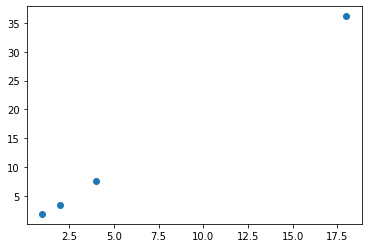

In [126]:
# `u` is twice `t`, plus a bit of randomness
u = t*2
u *= torch.randn_like(t)/10+0.95

plt.scatter(t, u);

In [127]:
prod = (t-t.mean())*(u-u.mean()); prod

tensor([ 54.4050,  37.5936,  10.5734, 280.9156])

In [128]:
prod.mean()

tensor(95.8719)

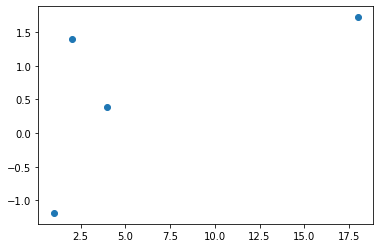

In [138]:
w = torch.randn_like(t)
plt.scatter(t,w);

In [141]:
#CO-VARIANCE
cov = ((t-t.mean())*(w-w.mean())).mean()

#### Pearsons Corealtion Coefficient
cov(X,Y) / X.SD * Y.SD

In [142]:
cov / (t.std()) * (w.std())

tensor(0.8120)

## Softmax

In [143]:
def log_softmax(x):
    return x - x.exp().sum(-1, keepdim=True).log()